<a href="https://colab.research.google.com/github/BadriAmouri/Spark/blob/main/week_9_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Week 9 GAN Assignment – Overview

In this assignment, we work with a GAN (Generative Adversarial Network) pipeline for 3D medical image generation and improve it through preprocessing, model enhancement, and experiment tracking. The goal is to ensure better data quality, stronger architectures, and reproducible experiments.

---

### ✅ Task Summary

**Q1: Apply RescaleIntensity Transform**  
Use TorchIO to normalize voxel intensities by clipping them between the 0th and 99.5th percentiles and rescaling to [0, 1].

**Q2: Replace Generator with U-Net**  
Replace the existing Generator model with a U-Net architecture.  
*Extra Credit:* Use a SwinUNETR model instead of a basic U-Net for better performance on 3D medical data.

**Q3: Configure W&B Experiment Tracking**  
Integrate Weights & Biases (W&B) into your training loop for experiment logging.  
Generate and use your W&B API key to enable tracking and visualization of training metrics.

---

By completing these tasks, we enhance the preprocessing, architecture, and tracking of our GAN pipeline for 3D medical image synthesis.

## 🧪 Q1: Apply RescaleIntensity Transform

### 🔍 Objective
To preprocess 3D medical images by normalizing their voxel intensities using the `RescaleIntensity` transform from the **TorchIO** library.

### 🧠 What It Does
- **Clips** voxel intensity values between the **0th and 99.5th percentiles** to remove outliers.
- **Rescales** the clipped values to a fixed range **[0, 1]** for normalization.

### 🎯 Why It’s Important
Normalizing intensity values ensures that all input images are on a similar scale, which:
- Improves model convergence during training.
- Reduces the impact of outliers in the input data.
- Makes the dataset more consistent across patients and scanners.

### 🛠️ Tool Used
- [`RescaleIntensity`](https://torchio.readthedocs.io/transforms/preprocessing.html) from the **TorchIO** library.
- TorchIO is designed for loading, preprocessing, and augmenting 3D medical images.

### 📌 Summary
By applying this transform, we enhance data quality and prepare our medical images for training within a GAN architecture.

In [2]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Tensor shape: torch.Size([1, 181, 217, 181])
Min: 0.0 Max: 1.0


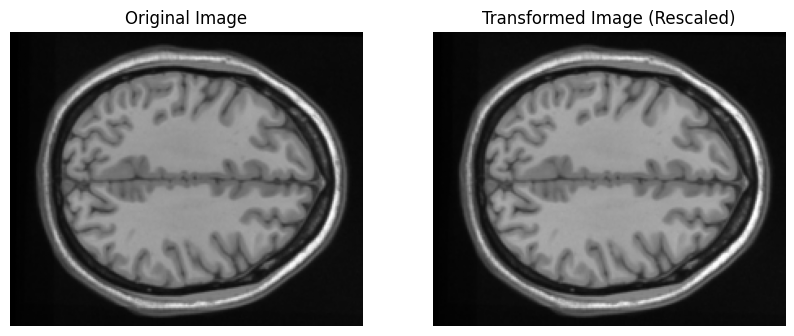

In [7]:
import torchio as tio
import matplotlib.pyplot as plt


# Define the intensity transform
transform = tio.RescaleIntensity(out_min_max=(0, 1), percentiles=(0, 99.5))

# Download a sample subject from TorchIO's example data
subject = tio.datasets.Colin27()  # Colin27 is a sample T1-weighted brain scan
image = subject.t1  # This is already a ScalarImage

# Load the image into a new TorchIO Subject (optional in this case)
subject = tio.Subject(t1=image)

# Visualize the original image (before transformation)
plt.figure(figsize=(10, 5))

# Display the original image (slice at the middle)
plt.subplot(1, 2, 1)
plt.imshow(image.data[0, :, :, image.shape[2] // 2], cmap='gray')
plt.title('Original Image')
plt.axis('off')


# Apply the RescaleIntensity transform
transformed_subject = transform(subject)

# Get the transformed tensor data
image_tensor = transformed_subject.t1.data
print("Tensor shape:", image_tensor.shape)
print("Min:", image_tensor.min().item(), "Max:", image_tensor.max().item())


# Visualize the transformed image (after transformation)
plt.subplot(1, 2, 2)
plt.imshow(transformed_subject.t1.data[0, :, :, transformed_subject.t1.shape[2] // 2], cmap='gray')
plt.title('Transformed Image (Rescaled)')
plt.axis('off')

plt.show()

## 🧪 Applying the `RescaleIntensity` Transform

### 🔍 Objective
We will apply the `RescaleIntensity` transform from **TorchIO** to a sample brain scan (Colin27). This transform clips the voxel intensities between the 0th and 99.5th percentiles ( removing outliers )  and rescales them to the range **[0, 1]**.


### 🔍 What Happens:
1. **Before Scaling (Original Image):**  
   The original image has raw intensity values, which may include outliers and varying intensity ranges across the scan.
   
2. **After Scaling (Transformed Image):**  
   The `RescaleIntensity` transform clips the voxel intensities between the 0th and 99.5th percentiles and rescales the values to the **[0, 1]** range. This normalization standardizes the intensities, making the image more suitable for model training.
